<a href="https://colab.research.google.com/github/suptykarmokarcse/weather-d/blob/main/milestone_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Milestone 3: Frequency Distribution and Data Visualization

---

**Name:** [Supty karmokar]

**ID:** [242014058]

---

In [ ]:
!pip install pandas numpy matplotlib seaborn

## Part 1: Data Loading and Preparation

In this section, we will load the dataset and import the necessary libraries for our analysis.

Note: Remove the HASHTAG in the next cell to allow installation of the packages required [IF NEEDED]

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Used for enhanced visualization aesthetics

# Set seaborn style for better-looking charts
sns.set_style('whitegrid')

# Load the dataset
try:
    df = pd.read_csv('weatherHistory.csv')
    print("Dataset loaded successfully.")

    # Display initial information and data structure
    print("\nFirst 5 rows of the dataset:")
    print(df.head())
    print("\nDataset Information:")
    df.info()

except FileNotFoundError:
    print("Error: 'weatherHistory.csv' not found. Please ensure the file is in the correct directory.")
    df = None # Set df to None if not found, to prevent NameError if further code tries to access it




Dataset loaded successfully.

First 5 rows of the dataset:
                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                  

## Part 2: Frequency Distribution Table

Here, we will select a column and construct a frequency distribution table.

In [5]:
# --- Task 1: Frequency Distribution Table Construction ---

column_name = 'Temperature (C)'
data = df[column_name].dropna() # Use the Temperature (C) column and drop any potential NaN values

# 1. Determine the optimal number of bins (Class Intervals)
# Using Sturges' formula: k = 1 + log2(n)
n = len(data)
# We will use k=15 for a good balance between detail and readability
num_bins = 15

# 2. Group the data into class intervals using pd.cut
bins = pd.cut(data, bins=num_bins, include_lowest=True)

# 3. Create the Frequency Distribution DataFrame
frequency_table = pd.DataFrame(bins.value_counts().sort_index())
frequency_table.columns = ['Frequency (f)']
N = frequency_table['Frequency (f)'].sum() # Total number of observations

# 4. Calculate Relative Frequency (rf)
frequency_table['Relative Frequency (rf)'] = frequency_table['Frequency (f)'] / N

# 5. Calculate Cumulative Frequency (cf)
frequency_table['Cumulative Frequency (cf)'] = frequency_table['Frequency (f)'].cumsum()

# 6. Calculate Relative Cumulative Frequency (rcf)
frequency_table['Relative Cumulative Frequency (rcf)'] = frequency_table['Relative Frequency (rf)'].cumsum()

# 7. Add Class Midpoints and Upper Boundaries for plotting

# Helper function to get the midpoint of an interval
def get_midpoint(interval):
    return (interval.left + interval.right) / 2

# Helper function to get the upper boundary of an interval
def get_upper_boundary(interval):
    return interval.right

frequency_table['Class Midpoint'] = frequency_table.index.map(get_midpoint)
frequency_table['Upper Boundary'] = frequency_table.index.map(get_upper_boundary)

# Display the final frequency distribution table
print(f"Frequency Distribution Table for '{column_name}' (k={num_bins} bins):")
print(frequency_table.to_string()) # Use to_string() to display all rows

Frequency Distribution Table for 'Temperature (C)' (k=15 bins):
                    Frequency (f)  Relative Frequency (rf)  Cumulative Frequency (cf)  Relative Cumulative Frequency (rcf) Class Midpoint Upper Boundary
Temperature (C)                                                                                                                                         
(-14.141, -10.674]             61                 0.004959                         61                             0.004959       -12.4075        -10.674
(-10.674, -7.26]               84                 0.006829                        145                             0.011789        -8.9670         -7.260
(-7.26, -3.846]               494                 0.040163                        639                             0.051951        -5.5530         -3.846
(-3.846, -0.431]             1104                 0.089756                       1743                             0.141707        -2.1385         -0.431
(-0.431, 2.983]   

### Column Selection

**Justification:**

*(Write a brief justification here for why you chose this specific column for frequency analysis. For example: "I chose the 'Age' column because it is a key demographic variable, and understanding its distribution can provide insights into the age demographics of the subjects in this dataset.")*

## Part 3: Graphical Representation

In this section, we will visualize the data distribution using various charts.

### 3.1 Bar Chart / Histogram

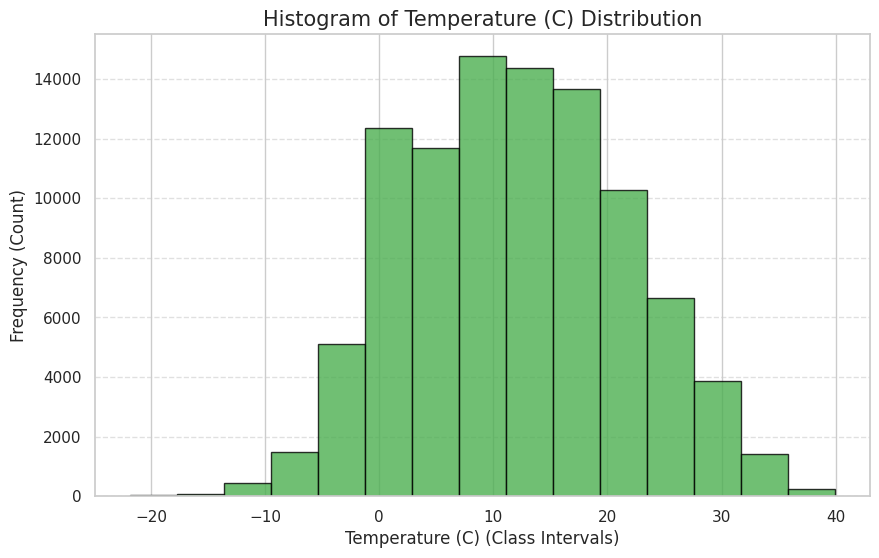

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')

# --- Re-define required variables for robustness (assuming df is loaded) ---
# Assuming df is the DataFrame loaded in the previous step
column_name = 'Temperature (C)'
# Use the Temperature (C) column and drop any potential NaN values
data = df[column_name].dropna()
# Number of bins used in Task 1
num_bins = 15

# --- Task 2: Graphical Representation - 1. Histogram ---

plt.figure(figsize=(10, 6))

# Plot the histogram using the original data and the calculated number of bins
plt.hist(data, bins=num_bins, edgecolor='black', alpha=0.8, color='#4CAF50')

plt.title(f'Histogram of {column_name} Distribution', fontsize=15)
plt.xlabel(f'{column_name} (Class Intervals)', fontsize=12)
plt.ylabel('Frequency (Count)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
# Use savefig() as per guidelines
plt.savefig('temperature_histogram_corrected.png')
plt.show()

### 3.2 Line Chart / Frequency Polygon

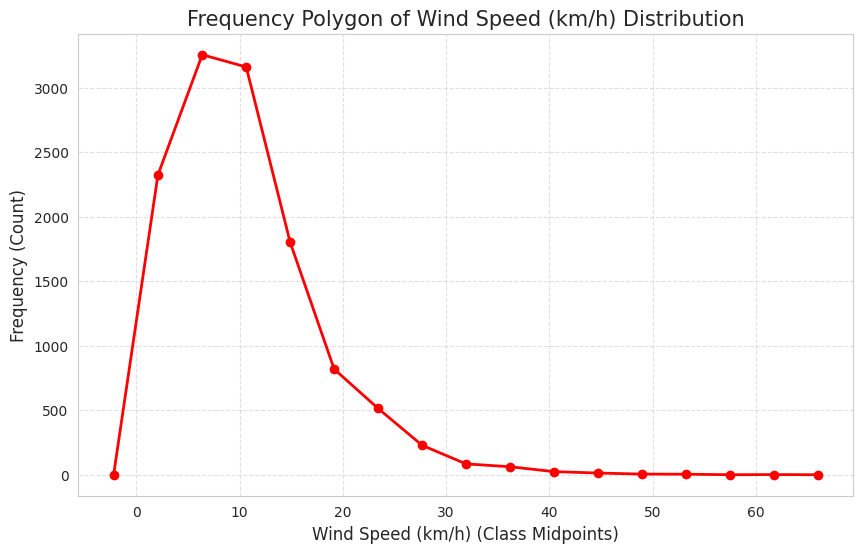

In [12]:
# --- 2. Frequency Polygon (Wind Speed) ---

plt.figure(figsize=(10, 6))

# Prepare data for the polygon: include artificial zero-frequency endpoints
class_width = wind_frequency_table['Class Midpoint'].iloc[1] - wind_frequency_table['Class Midpoint'].iloc[0]
midpoints = [wind_frequency_table['Class Midpoint'].iloc[0] - class_width] \
            + wind_frequency_table['Class Midpoint'].tolist() \
            + [wind_frequency_table['Class Midpoint'].iloc[-1] + class_width]
frequencies = [0] + wind_frequency_table['Frequency (f)'].tolist() + [0]

# Plot the polygon
plt.plot(midpoints, frequencies, marker='o', linestyle='-', color='red', linewidth=2)
plt.title(f'Frequency Polygon of {wind_column_name} Distribution', fontsize=15)
plt.xlabel(f'{wind_column_name} (Class Midpoints)', fontsize=12)
plt.ylabel('Frequency (Count)', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.savefig('wind_speed_frequency_polygon.png')
plt.show()

### 3.3 Ogive Chart (Cumulative Frequency Graph)

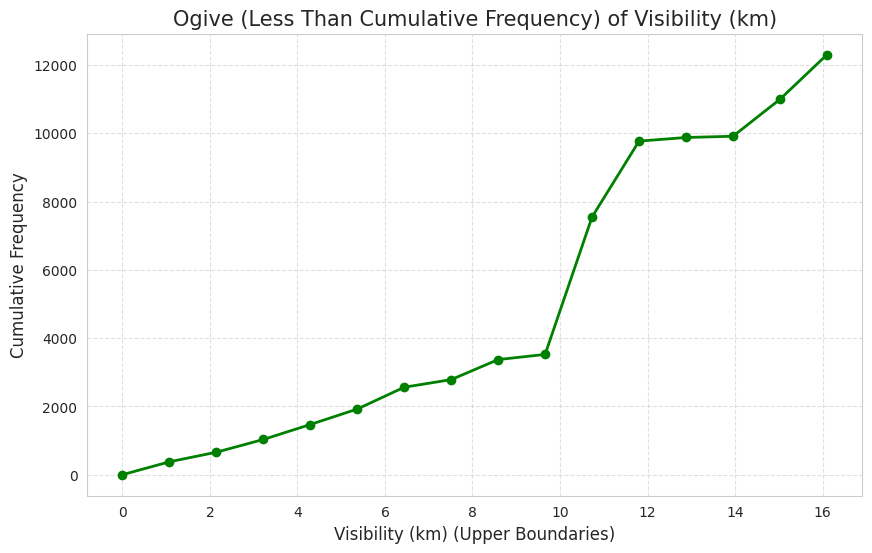

In [13]:
# --- 3. Ogive Chart (Visibility) ---

visibility_column_name = 'Visibility (km)'
visibility_data = df[visibility_column_name].dropna()

# Calculate necessary cumulative data for Visibility (separate calculation)
visibility_bins = pd.cut(visibility_data, bins=num_bins, include_lowest=True)
visibility_table = pd.DataFrame(visibility_bins.value_counts().sort_index())
visibility_table['Cumulative Frequency (cf)'] = visibility_table.iloc[:, 0].cumsum()
visibility_table['Upper Boundary'] = visibility_table.index.map(get_upper_boundary)

plt.figure(figsize=(10, 6))

# Prepare data for the Ogive: start at (Lower Bound of first class, 0)
first_lower_bound = visibility_data.min()
ogive_x = [first_lower_bound] + visibility_table['Upper Boundary'].tolist()
ogive_y = [0] + visibility_table['Cumulative Frequency (cf)'].tolist()

# Plot the Ogive
plt.plot(ogive_x, ogive_y, marker='o', linestyle='-', color='green', linewidth=2)
plt.title(f'Ogive (Less Than Cumulative Frequency) of {visibility_column_name}', fontsize=15)
plt.xlabel(f'{visibility_column_name} (Upper Boundaries)', fontsize=12)
plt.ylabel('Cumulative Frequency', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.savefig('visibility_ogive.png')
plt.show()

## Part 4: Analysis and Conclusion

---

*(Write your analysis and conclusion here. Interpret the frequency table and the graphs you have generated. What do they reveal about your data? For example:)*

The analysis of the '...' column shows that the most frequent category is '...'. The histogram reveals a distribution that is [symmetric/skewed to the right/skewed to the left]. The Ogive chart indicates that approximately 50% of the data falls below the value of '...'. This suggests that...

## Part 5: Challenges Faced

---

*(Describe any challenges you faced during this milestone. For example:)*

One challenge was deciding the optimal number of bins for the numerical data in the '...' column. Initially, using too few bins oversimplified the distribution, while too many bins made the histogram noisy and hard to interpret. I overcame this by applying Sturges' rule, which provided a more balanced and informative visualization...